<a href="https://colab.research.google.com/github/gsgh3016/Pytorch-study/blob/main/Gamchan/chap07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 합성곱과 풀링

## 1-1 합성곱 신경망의 대두
* ex) 이미지 텐서 &rarr; 1차원 벡터: 공간 구조 정보 유실 $\therefore$ 합성곱 신경망

## 1-2 채널
* ex) 컬러 이미지 텐서 &rarr; RGB 등으로 분리 가능
높이 X 너비 X 깊이(각 색깔 별 채널)

## 1-3 합성곱 연산
* 이미지 특징 추출
* 커널(필터): n(높이)x m(너비)<br>*일반적으로 3x3 혹은 5x5 사용함
* 합성곱 연산 결과: 특성 맵
* 스트라이드(stride): 이동 범위

## 1-4 패딩
* 합성곱 연산 결과 특성 맵의 크기를 입력과 동일하게 만들기 위함
* 행, 열 추가
* 주로 제로 패딩을 사용
* 3x3 커널: 1폭 제로 패딩, 5x5 커널: 2폭 제로 패딩

## 1-5 가중치와 편향

### 1) 합성곱 신경망의 가중치
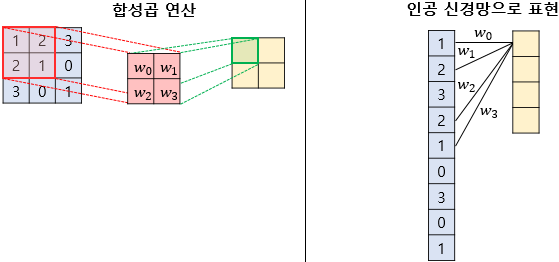

* 합성곱 층: 합성곱 연산(특성 맵) + 활성화 함수 passing

### 2) 합성곱 신경망의 편향: 하나만 존재 &rarr; 모든 원소에 더해짐

## 1-6 특성 맵의 크기 계산 방법
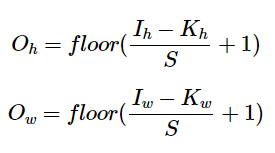<br>
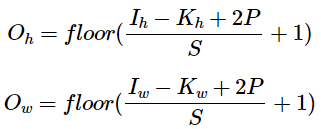

## 1-7 다수의 채널을 가질 경우(3차원 텐서 합성곱 연산)
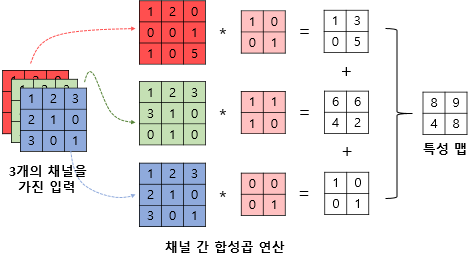

## 1-8 3차원 텐서의 합성곱 연산
* 사용한 커널 수 = 특성 맵의 채널 수
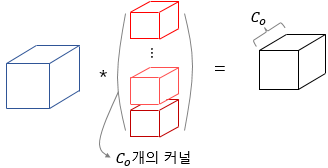

## 1-9 풀링(Pooling)
* 합성곱 층 다음에는 풀링 층 추가
* 최대 풀링(max pooling), 평균 풀링(average pooling) 사용

# 2. CNN으로 MNIST 분류하기

## 2-1 모델 이해하기
* 맥스 풀링을 한 층으로 보는지 안 보는지 차이

## 2-2 모델 구현하기

### 1) import

In [ ]:
import torch
import torch.nn as nn

In [ ]:
inputs = torch.Tensor(1, 1, 28, 28)
print(f"텐서의 크기: {inputs.shape}")

텐서의 크기: torch.Size([1, 1, 28, 28])


### 2) 합성곱층과 풀링 선언하기

In [ ]:
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


### 3) 구현체를 연결하여 모델 만들기

In [ ]:
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
out.size(0)

1

In [ ]:
out.size(1)

64

In [ ]:
out.size(2)

7

In [ ]:
out.size(3)

7

In [ ]:
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


## 2-3 CNN으로 MNIST 분류하기

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed(777)

In [ ]:
learning_rate = .001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 161289953.23it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 116701053.78it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 52889961.74it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 23461242.33it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째 층
        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                                          torch.nn.ReLU(),
                                          torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                          torch.nn.ReLU(),
                                          torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
print(f"# of total batches: {total_batch}")

# of total batches: 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f"Epoch: {epoch + 1: 4d}, Cost: {avg_cost:.9f}")

Epoch:    1, Cost: 0.225724131
Epoch:    2, Cost: 0.063037984
Epoch:    3, Cost: 0.046325613
Epoch:    4, Cost: 0.037474163
Epoch:    5, Cost: 0.031440523
Epoch:    6, Cost: 0.026160929
Epoch:    7, Cost: 0.021916119
Epoch:    8, Cost: 0.018367862
Epoch:    9, Cost: 0.016362106
Epoch:   10, Cost: 0.013382929
Epoch:   11, Cost: 0.010151097
Epoch:   12, Cost: 0.010579888
Epoch:   13, Cost: 0.008554961
Epoch:   14, Cost: 0.006153897
Epoch:   15, Cost: 0.007102316


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.986799955368042


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 3. 깊은 CNN으로 MNIST 분류하기

## 3-1 모델 이해하기

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 202944964.14it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 9900751.44it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 78948531.92it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22760488.37it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [ ]:
# CNN 모델 정의
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))


총 배치의 수 : 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.19070214
[Epoch:    2] cost = 0.0520662256
[Epoch:    3] cost = 0.0361137055
[Epoch:    4] cost = 0.0299411919
[Epoch:    5] cost = 0.0234945733
[Epoch:    6] cost = 0.020610258
[Epoch:    7] cost = 0.0178243425
[Epoch:    8] cost = 0.0154452911
[Epoch:    9] cost = 0.0124499099
[Epoch:   10] cost = 0.0117316116
[Epoch:   11] cost = 0.0102459732
[Epoch:   12] cost = 0.010455098
[Epoch:   13] cost = 0.00827714149
[Epoch:   14] cost = 0.0091498578
[Epoch:   15] cost = 0.00804824196


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9794999957084656


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 4. 자연어 처리를 위한 1D CNN

## 4-1 2D 합성곱 vs 1D 합성곱
* 2D 합성곱: 커널이 상하좌우로 움직임
* 1D 합성곱: 커널의 너비는 임베딩 벡터의 차원과 같음 &rarr; 커널의 높이만 커널의 크기로 간주함<br>
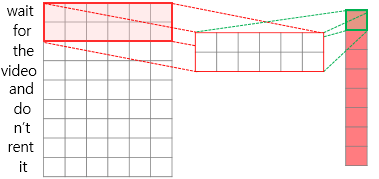

* 커널에 따라 참고하는 단어의 묶음의 크기가 다름 &rarr; n-gram

## 4-2 신경망 설계
* 소프트맥스를 활용한 분류
* 커널의 크기를 4, 3, 2 각각 2개씩
* 맥스 풀링 후 스칼라값을 연결(concatenate)
* Dense Layer를 활용햐서 출력 층에 연결
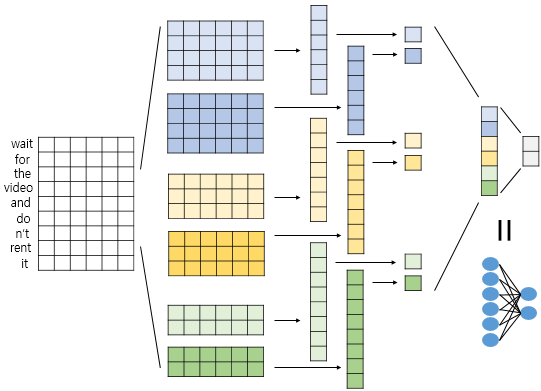